# GPT Specimens
Search for specimens using [GPT-3](https://platform.openai.com/docs/guides/)

In [1]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
from pandas.io.json import json_normalize
import openai
from pyjarowinkler.distance import get_jaro_distance # to calculate a similarity score for a pair of strings

Extract verified labels from text spans for comparison

In [2]:
df = pd.read_json('../data/specimen_truth_deck.jsonl', lines=True).reset_index() # expose index
df["manual_codes"] = ""

for index, row in df.iterrows():
    specimens = []
    spans = row["spans"]
    for i in spans:
        ref = i.get("text")
        specimens.append(ref)
    result = (", ".join(filter(None,specimens))) # change delimiter based on comparison metric
    df["manual_codes"][index] = result

df['manual_codes'].replace("", "NA", inplace=True) # replace empty codes with NA for string similarity measure
df

/tmp/ipykernel_1195799/2698036432.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["manual_codes"][index] = result


,index,text,meta,_input_hash,_task_hash,_is_binary,spans,tokens,_view_id,answer,_timestamp,manual_codes
0,0,Sixteen skeletons representing five species (S...,{'meta': '{'95dd24bd-27c4-bf8d-5994-90667d4165...,-68186736,-1302981997,False,[],"[{'text': 'Sixteen', 'start': 0, 'end': 7, 'id...",ner_manual,accept,1677099355,NA
1,1,A collection of G. affinis in 1936 from an irr...,{'meta': '{'685e406b-8171-31eb-9766-c1439c9afc...,-998766942,1803169322,False,"[{'text': 'UMMZ 110467', 'start': 78, 'end': 8...","[{'text': 'A', 'start': 0, 'end': 1, 'id': 0, ...",ner_manual,accept,1677099360,UMMZ 110467
2,2,Type-material is deposited in the following in...,{'meta': '{'35783f66-2114-c2d6-50ea-1324862f78...,2030282880,-922568282,False,[],"[{'text': 'Type', 'start': 0, 'end': 4, 'id': ...",ner_manual,accept,1677099370,NA
3,3,"Holotype and most paratypes-ZISP, 2 female par...",{'meta': '{'35783f66-2114-c2d6-50ea-1324862f78...,1598185019,-1646348169,False,[],"[{'text': 'Holotype', 'start': 0, 'end': 8, 'i...",ner_manual,accept,1677099378,NA
4,4,"Holotype and most paratypes-ZISP, 2 male and 2...",{'meta': '{'35783f66-2114-c2d6-50ea-1324862f78...,-406055451,-682729028,False,[],"[{'text': 'Holotype', 'start': 0, 'end': 8, 'i...",ner_manual,accept,1677099382,NA
...,...,...,...,...,...,...,...,...,...,...,...,...
370,370,Voucher specimens of the mite species bearing ...,{'meta': '{'d3b564b0-8be0-4c3e-5c94-938160c6b3...,1173569346,136622145,False,[],"[{'text': 'Voucher', 'start': 0, 'end': 7, 'id...",ner_manual,accept,1677106950,NA
371,371,Additional radiographs of juvenile (305 mm tot...,{'meta': '{'d3447490-96fd-35d0-adf2-0806e52146...,302278082,59311565,False,"[{'text': 'UMMZ 70046', 'start': 57, 'end': 67...","[{'text': 'Additional', 'start': 0, 'end': 10,...",ner_manual,accept,1677106953,"UMMZ 70046, UMMZ 157208"
372,372,Two other paratypes have been deposited in the...,{'meta': '{'4c1f59df-f6b4-160b-d466-c7725df567...,1271214344,-531623889,False,[],"[{'text': 'Two', 'start': 0, 'end': 3, 'id': 0...",ner_manual,accept,1677106955,NA
373,373,T (UMMZ 43037) and paratypes (UMMZ 42991-43036...,{'meta': '{'992e7dea-0374-3263-4a06-09aa827acd...,993384249,-747251974,False,"[{'text': 'UMMZ 43037', 'start': 3, 'end': 13,...","[{'text': 'T', 'start': 0, 'end': 1, 'id': 0, ...",ner_manual,accept,1677106962,UMMZ 43037


Check sentences, codes

In [3]:
for index, row in df.sample(10).iterrows():
    print(row['text'], "[CODE:", row['manual_codes'], "]\n-----")

In life the coloration of the female (UMMZ 206952) is generally similar to the male except that the body, limb, and tail coloration is pale green, not blue, the rostral crest is green and brown, the ventral surfaces of the body and tail have fine darker brown flecks, and the body and limb tubercles are green.  [CODE: UMMZ 206952 ]
-----
Type-material is deposited in the following institutions: INBio, Instituto Nacional de Biodiversidad (Santo Domingo, Heredia, Costa Rica); UMMZ, Museum of Zoology of the University of Michigan (Ann Arbor, USA); ZISP, the Zoological Institute of the Russian Academy of Sciences (Saint Petersburg, Russia). [CODE: NA ]
-----
A group of 6-8 pairs of ventral glands occurs in one D. quadramaculatus (UMMZ 187412) but are lacking in the other specimen of this species examined (UMMZ 187411).  [CODE: UMMZ 187412, UMMZ 187411 ]
-----
Three-dimensional cutaway views along the transverse axis of Casarea dussumieri (UMMZ 190285) based on HRXCT data.  [CODE: UMMZ 19028

Prepare GPT API connection

In [4]:
with open('GPT_SECRET_KEY.json') as f:
    data = json.load(f)
    
openai.api_key = data["API_KEY"]

Import GPT client from script

In [5]:
from gpt import GPT
from gpt import Example

In [6]:
gpt = GPT(engine="text-davinci-003",
          temperature=0.5,
          max_tokens=100)

Optional: make a dataframe for testing and add examples to show GPT what we want it to do
- first examples contain a specimen code
- last examples contain acknowledgements with prefixes

Zero shot: no examples provided

To try: adjusting examples, adding more examples, changing query prompt

In [7]:
# sent_sol = {"The groove is usually difficult or impossible to see with the naked eye but it is conspicuous in a few specimens, for example UMMZ 78654.":"UMMZ 78654", 
#             "In order to clarify the application of Cercolabes melanurus, we select as lectotype NMW 42010, an adult female collected in February 1834.":"NMW 42010", 
#             "Dorsal, ventral, and lateral views of the skull, and lateral view of the left hemimandible of the holotype of Marmosops creightoni ; however, some missing details are reconstructed from UMMZ 155999.":"UMMZ 155999",
#             "I am also grateful to the following institutions and persons who permitted me to examine specimens in their care (abbreviations identify specimens examined in text): American Museum of Natural History (AMNH).":"none",
#             "We thank the specimen collectors, collection managers, and the curators of the Museo de Zoología “Alfonso L. Herrera”, Facultad de Ciencias, UNAM (MZFC) and the University of Michigan Museum of Zoology (UMMZ) that granted sample loans. We specially thank Philip Myers (UMMZ) for the loan of P. mekisturus sample to the first author during the fulfillment of her Ph.D. dissertation research.":"none",
#             "Acknowledgements The authors wish to thank Clare O’Connell, Michael Kiso, Jack Lemke, and Evan Miller for providing laboratory assistance; Beatrice Hahn and Jesse Connell for their assistance imple- menting the CHIIMP pipeline; and Nancy Rotzel and Katie Murphy for performing the sequencing runs at the Center for Conservation Genomics, Smithsonian Conservation Biology Institute, and the Labo- ratory of Analytical Biology, National Museum of Natural History, Smithsonian Institution, respectively. Several museums allowed for destructive sampling of specimens: MVZ, Chris Conroy, Jim Patton, Eileen Lacey, and Michael Nachman; LACM, Jim Dines, and Kayce Bell; HSU, Alyssa Semerdjian, Nick Kerhoulas, and Allison Bronson; and UMMZ, Cody Thompson.":"none",
#          }

# indf = pd.DataFrame.from_dict(sent_sol,orient='index').reset_index().rename(columns={"index": "sentence", 0: "solution"})
# indf

# for i in range(len(indf)):
#     gpt.add_example(Example(indf.sentence.iloc[i], indf.solution.iloc[i]))

Prepare queries with prompts for GPT to answer

In [8]:
prompt = "Extract specimen codes from the following sentence:\n\n"

index = []
query = []
answer = []

testing=0
if testing==1:
    df = df[:10] # subset for testing

for i in tqdm(range(len(df))):
    q = prompt + df.text[i]
    output = gpt.submit_request(q)
#     print(output)
    index.append(df.index[i])
    query.append(df.text[i])
    answer.append(output.choices[0].text.replace("Answer: ","").replace("\noutput: ","").replace("\nOutput: ","").replace("\n",""))

result = list(zip(index, answer))
outdf = pd.DataFrame(result, columns = ['index', 'gpt_answer'])
outdf

100%|██████████| 375/375 [06:38<00:00,  1.06s/it]


,index,gpt_answer
0,0,"UMMZ, NME"
1,1,UMMZ 110467
2,2,"UMMZ, ZISP"
3,3,"ZISP, UMMZ"
4,4,"ZISP, UMMZ"
...,...,...
370,370,BMOC and HK
371,371,"UMMZ 70046, UMMZ 157208"
372,372,"UMMZ, NSMT"
373,373,"UMMZ 43037, UMMZ 42991-43036"


Join GPT sentence on index and find intersection of codes using Jaro Winkler score [0-1]

In [9]:
comp_df = pd.merge(df, outdf, on=['index'])
comp_df['sim_score'] = [get_jaro_distance(x, y) for x, y in zip(comp_df['manual_codes'], comp_df['gpt_answer'])]
comp_df

,index,text,meta,_input_hash,_task_hash,_is_binary,spans,tokens,_view_id,answer,_timestamp,manual_codes,gpt_answer,sim_score
0,0,Sixteen skeletons representing five species (S...,{'meta': '{'95dd24bd-27c4-bf8d-5994-90667d4165...,-68186736,-1302981997,False,[],"[{'text': 'Sixteen', 'start': 0, 'end': 7, 'id...",ner_manual,accept,1677099355,NA,"UMMZ, NME",0.00
1,1,A collection of G. affinis in 1936 from an irr...,{'meta': '{'685e406b-8171-31eb-9766-c1439c9afc...,-998766942,1803169322,False,"[{'text': 'UMMZ 110467', 'start': 78, 'end': 8...","[{'text': 'A', 'start': 0, 'end': 1, 'id': 0, ...",ner_manual,accept,1677099360,UMMZ 110467,UMMZ 110467,1.00
2,2,Type-material is deposited in the following in...,{'meta': '{'35783f66-2114-c2d6-50ea-1324862f78...,2030282880,-922568282,False,[],"[{'text': 'Type', 'start': 0, 'end': 4, 'id': ...",ner_manual,accept,1677099370,NA,"UMMZ, ZISP",0.00
3,3,"Holotype and most paratypes-ZISP, 2 female par...",{'meta': '{'35783f66-2114-c2d6-50ea-1324862f78...,1598185019,-1646348169,False,[],"[{'text': 'Holotype', 'start': 0, 'end': 8, 'i...",ner_manual,accept,1677099378,NA,"ZISP, UMMZ",0.00
4,4,"Holotype and most paratypes-ZISP, 2 male and 2...",{'meta': '{'35783f66-2114-c2d6-50ea-1324862f78...,-406055451,-682729028,False,[],"[{'text': 'Holotype', 'start': 0, 'end': 8, 'i...",ner_manual,accept,1677099382,NA,"ZISP, UMMZ",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,370,Voucher specimens of the mite species bearing ...,{'meta': '{'d3b564b0-8be0-4c3e-5c94-938160c6b3...,1173569346,136622145,False,[],"[{'text': 'Voucher', 'start': 0, 'end': 7, 'id...",ner_manual,accept,1677106950,NA,BMOC and HK,0.00
371,371,Additional radiographs of juvenile (305 mm tot...,{'meta': '{'d3447490-96fd-35d0-adf2-0806e52146...,302278082,59311565,False,"[{'text': 'UMMZ 70046', 'start': 57, 'end': 67...","[{'text': 'Additional', 'start': 0, 'end': 10,...",ner_manual,accept,1677106953,"UMMZ 70046, UMMZ 157208","UMMZ 70046, UMMZ 157208",1.00
372,372,Two other paratypes have been deposited in the...,{'meta': '{'4c1f59df-f6b4-160b-d466-c7725df567...,1271214344,-531623889,False,[],"[{'text': 'Two', 'start': 0, 'end': 3, 'id': 0...",ner_manual,accept,1677106955,NA,"UMMZ, NSMT",0.00
373,373,T (UMMZ 43037) and paratypes (UMMZ 42991-43036...,{'meta': '{'992e7dea-0374-3263-4a06-09aa827acd...,993384249,-747251974,False,"[{'text': 'UMMZ 43037', 'start': 3, 'end': 13,...","[{'text': 'T', 'start': 0, 'end': 1, 'id': 0, ...",ner_manual,accept,1677106962,UMMZ 43037,"UMMZ 43037, UMMZ 42991-43036",0.87


See the distribution of Jaro-Winkler scores (score > 0.5 is acceptable)

In [14]:
comp_df.sim_score.describe()

count    375.000000
mean       0.430267
std        0.434857
min        0.000000
25%        0.000000
50%        0.510000
75%        0.915000
max        1.000000
Name: sim_score, dtype: float64

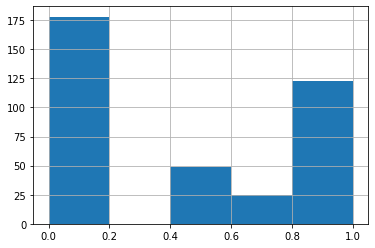

In [17]:
comp_df.sim_score.hist(bins=5);